# Winning Jeopardy

In [1]:
import pandas as pd
import numpy as np


In [2]:
jeopardy=pd.read_csv('jeopardy.csv')
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [3]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [4]:
jeopardy.columns=['Show Number', 'Air Date', 'Round', 'Category', 'Value',
       'Question', 'Answer']

In [5]:
import re
def normalize_text(text):
    text=text.lower()
    text=re.sub('[^A-Za-z0-9\s]','',text)
    text=re.sub('\s+',' ',text)
    return text

In [6]:
jeopardy_copy=jeopardy.copy()

In [7]:
jeopardy_copy['clean_question']=jeopardy_copy['Question'].apply(normalize_text)

In [8]:
jeopardy_copy['clean_answer']=jeopardy_copy['Answer'].apply(normalize_text)

In [9]:
jeopardy_copy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


In [10]:
def normalize_values(text):
    text=re.sub('[^A-Za-z0-9\s]','',text)
    try:
        text=int(text)
    except Exception:
        text=0
    return text

In [11]:
jeopardy_copy['clean_value']=jeopardy_copy['Value'].apply(normalize_values)

In [12]:
jeopardy_copy['Air Date']=pd.to_datetime(jeopardy_copy['Air Date'])

In [13]:
jeopardy_copy.dtypes

Show Number                int64
Air Date          datetime64[ns]
Round                     object
Category                  object
Value                     object
Question                  object
Answer                    object
clean_question            object
clean_answer              object
clean_value                int64
dtype: object

In [14]:
def count_matches(text):
    split_answer=text['clean_answer'].split()
    split_question=text['clean_question'].split()
    match_count=0
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer)==0:
        return 0
    for word in split_answer:
        if word in split_question:
            match_count+=1
        
    return match_count/len(split_answer)    

In [15]:
jeopardy_copy['answer_in_question']=jeopardy_copy.apply(count_matches,axis=1)

In [16]:
jeopardy_copy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200,0.0
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200,0.0
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200,0.0
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200,0.0


In [17]:
jeopardy_copy['answer_in_question'].mean()

0.059001965249777744

On average, the answer only makes up for about 6% of the question. This isn't a huge number, and means that we probably can't just hope that hearing a question will enable us to figure out the answer. We'll probably have to study.

In [18]:
question_overlap=[]
terms_used=set()
jeopardy_copy=jeopardy_copy.sort_values('Air Date')
for i, row in jeopardy_copy.iterrows():
    split_question=row['clean_question'].split(' ')
    split_question=[q for q in split_question if len(q)>5]
    match_count=0
    for word in split_question:
        if word in terms_used:
            match_count+=1
    for word in split_question:
        
        terms_used.add(word)
    if len(split_question)>0:
        match_count/=len(split_question)
    question_overlap.append(match_count)
jeopardy_copy['question_overlap']=question_overlap
jeopardy_copy['question_overlap'].mean()

0.6876260592169776

There is about 70% overlap between terms in new questions and terms in old questions. This only looks at a small set of questions, and it doesn't look at phrases, it looks at single terms. This makes it relatively insignificant, but it does mean that it's worth looking more into the recycling of questions.

In [19]:
def high_low_value(row):
    value=0
    if row['clean_value']>800:
        value=1
    return value

In [20]:
jeopardy_copy['high_value']=jeopardy_copy.apply(high_low_value,axis=1)

In [21]:
jeopardy_copy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question,question_overlap,high_value
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,None,"Adventurous 26th president, he was 1st to ride...",Theodore Roosevelt,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0,0.0,0.0,0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,$200,Notorious labor leader missing since '75,Jimmy Hoffa,notorious labor leader missing since 75,jimmy hoffa,200,0.0,0.0,0
19302,10,1984-09-21,Double Jeopardy!,1789,$200,"Washington proclaimed Nov. 26, 1789 this first...",Thanksgiving,washington proclaimed nov 26 1789 this first n...,thanksgiving,200,0.0,0.0,0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,$200,Both Ferde Grofe' & the Colorado River dug thi...,the Grand Canyon,both ferde grofe the colorado river dug this n...,the grand canyon,200,0.0,0.5,0
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,$200,"Depending on the book, he could be a ""Jones"", ...",Tom,depending on the book he could be a jones a sa...,tom,200,0.0,0.0,0


In [22]:
def count_usage(word):
    low_count=0
    high_count=0
    for i, row in jeopardy_copy.iterrows():
        split_question=row['clean_question'].split(' ')
        if word in split_question:
            if row['high_value']==1:
                high_count+=1
            else:
                low_count+=1
    return high_count,low_count

In [23]:
from random import choice
terms_used_list=list(terms_used)
comparison_terms=[choice(terms_used_list) for _ in range(10)]
observed_expected=[]
for term in comparison_terms:
    observed_expected.append(count_usage(term))
observed_expected

[(3, 6),
 (2, 7),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 4),
 (0, 1),
 (0, 1),
 (1, 7),
 (0, 1)]

In [25]:
from scipy.stats import chisquare
high_value_count=jeopardy_copy[jeopardy_copy['high_value']==1].shape[0]
low_value_count=jeopardy_copy[jeopardy_copy['high_value']==0].shape[0]

chi_square=[]
for o in observed_expected:
    total=sum(o)
    total_prop=total/jeopardy_copy.shape[0]
    high_value_rows=total_prop*high_value_count
    low_value_rows=total_prop*low_value_count
    
    observed = np.array([o[0],o[1]])
    expected = np.array([high_value_rows,low_value_rows])
    chi_square.append(chisquare(observed,expected))
chi_square

[Power_divergenceResult(statistic=0.09564350170321084, pvalue=0.75712159875701),
 Power_divergenceResult(statistic=0.18303865877777942, pvalue=0.6687747661279759),
 Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=1.607851384507536, pvalue=0.2047940943922556),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=1.0229964471766237, pvalue=0.31180929640924016),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469)]

(array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.0956435 , 0.33485836, 0.57407322, 0.81328809, 1.05250295,
        1.29171781, 1.53093267, 1.77014753, 2.00936239, 2.24857726,
        2.48779212]),
 <a list of 10 BarContainer objects>)

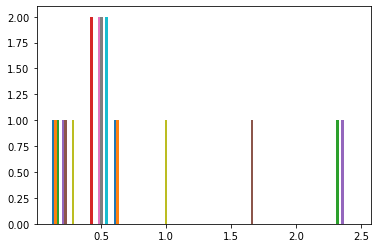

In [26]:
import matplotlib.pyplot as plt
plt.hist(chi_square)

None of the terms had a significant difference in usage between high value and low value rows. Additionally, the frequencies were all lower than 5, so the chi-squared test isn't as valid. It would be better to run this test with only terms that have higher frequencies.